In [6]:
pip install selenium pandas pyperclip matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from selenium import webdriver
import time
import pandas as pd
import pyperclip
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.actions.wheel_input import ScrollOrigin


In [4]:
chrome_options = webdriver.ChromeOptions()
# chromedriver 경로 입력
webdriver_service = Service('chromedriver.exe')

In [5]:
#아이디 입력
user_id = ''
#비밀번호 입력
user_pw = ''

In [30]:
# 네이버 계정 로그인
from selenium.webdriver.common.action_chains import ActionChains

# Chrome WebDriver 초기화
options = Options()
driver = webdriver.Chrome(service=webdriver_service, options=options)

# 크롤링할 웹페이지 주소 설정
# https://kream.co.kr/products/~ 기준으로 넣어줘야 함
url = 'https://kream.co.kr/products/27986'
driver.get(url)
data_list = []  # 크롤링한 데이터를 저장할 리스트


try:
    # 로그인 버튼 클릭
    login_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="wrap"]/div[4]/div[1]/div[1]/div[2]/div/div[6]/div[1]/div[4]/div/a'))
    )
    login_button.click()

    # 네이버 로그인 버튼 클릭
    naver_login_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="wrap"]/div[4]/div/div/div[4]/button[1]'))
    )
    naver_login_button.click()

    # 새로 열린 창으로 전환
    driver.switch_to.window(driver.window_handles[1])
    time.sleep(1)

    # 아이디 입력
    id_input = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, 'id'))
    )
    id_input.click()
    pyperclip.copy(user_id)
    id_input.send_keys(Keys.CONTROL, 'v')
    time.sleep(3)

    # 비밀번호 입력
    pw_input = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, 'pw'))
    )
    pw_input.click()
    pyperclip.copy(user_pw)
    pw_input.send_keys(Keys.CONTROL, 'v')

    # 로그인 버튼 클릭
    login_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="log.login"]'))
    )
    login_button.click()

    # 원래 창으로 전환
    driver.switch_to.window(driver.window_handles[0])
    time.sleep(2)

    # 채결 내역 클릭
    check_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="panel1"]/a'))
    )
    check_button.click()
    time.sleep(2)  

    try:
        iframe = driver.find_element(By.CLASS_NAME, "price_body") # 내부 스크롤 접근
        scroll_origin = ScrollOrigin.from_element(iframe)
        for i in range(1,800): # 동적할당을 받기위한 스크롤 반복
            ActionChains(driver)\
                .scroll_from_origin(scroll_origin, 0, 2000)\
                .perform()
                
        print("크롤링 작업중")  
              
        for i in range(1, 1000):  # 1부터 1000까지의 div를 확인
            xpath1 = '//*[@id="panel1"]/div/div/div[2]/div[{}]/div[1]/span'.format(i)
            xpath2 = '//*[@id="panel1"]/div/div/div[2]/div[{}]/div[2]/span'.format(i)
            xpath3 = '//*[@id="panel1"]/div/div/div[2]/div[{}]/div[3]/span'.format(i)

            # 옵션
            element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath1))
            )
            data = element.text
            data_list.append(data)

            # 거래가격
            element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath2))
            )
            data = element.text
            data = ''.join(char for char in data if char.isdigit())  # 전처리
            data_list.append(data)

            # 거래일
            element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath3))
            )
            data = element.text
            data_list.append(data)

    except Exception as e:
        # 다음 div가 존재하지 않으면 종료
        print(f"Error: {e}")
        print("No more div elements. Crawling terminated.")

finally:
    # 작업이 끝나면 브라우저 닫기
    print("크롤링 완료")
    driver.quit()

# 데이터를 세 개씩 묶어 리스트로 만들기
col_data = [data_list[i:i + 3] for i in range(0, len(data_list), 3)]

# DataFrame 생성
df = pd.DataFrame(col_data, columns=['사이즈', '가격', '거래일'])

# Excel 파일로 저장
excel_filename = 'output.xlsx'
df.to_excel(excel_filename, index=True)


크롤링 작업중
크롤링 완료


In [ ]:
# 크림 계정 로그인

# Chrome WebDriver 초기화
options = Options()
driver = webdriver.Chrome(service=webdriver_service, options=options)

# 크림 크롤링 웹페이지 주소
# https://kream.co.kr/products/~ 기준으로 넣어줘야 함
url = 'https://kream.co.kr/products/21935'  
driver.get(url)
data_list=[]

try:
    # 로그인 버튼 클릭
    login_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="wrap"]/div[4]/div[1]/div[1]/div[2]/div/div[6]/div[1]/div[4]/div/a'))
    )
    login_button.click()
    time.sleep(1)

    # 아이디 입력
    id_input = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="wrap"]/div[4]/div/div/div[1]/div/input'))
    )
    id_input.click()
    pyperclip.copy(user_id)
    id_input.send_keys(Keys.CONTROL, 'v')
    time.sleep(3)

     # 비밀번호 입력
    pw_input = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="wrap"]/div[4]/div/div/div[2]/div/input'))
    )
    pw_input.click()
    pyperclip.copy(user_pw)
    pw_input.send_keys(Keys.CONTROL, 'v')
    
    # 로그인 버튼 클릭
    login_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="wrap"]/div[4]/div/div/div[3]/a'))
    )
    login_button.click()

    time.sleep(2)
    
    # 채결 내역 클릭
    check_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="panel1"]/a'))
    )
    check_button.click()
    time.sleep(2) 
    
    try:
        iframe = driver.find_element(By.CLASS_NAME, "price_body") # 내부 스크롤 접근
        scroll_origin = ScrollOrigin.from_element(iframe)
        for i in range(1,800): # 동적할당을 받기위한 스크롤 반복
            ActionChains(driver)\
                .scroll_from_origin(scroll_origin, 0, 2000)\
                .perform()
                
        print("크롤링 작업중")  
        for i in range(1, 1000):  # 1부터 1000까지의 div를 확인
            xpath1 = '//*[@id="panel1"]/div/div/div[2]/div[{}]/div[1]/span'.format(i)
            xpath2 = '//*[@id="panel1"]/div/div/div[2]/div[{}]/div[2]/span'.format(i)
            xpath3 = '//*[@id="panel1"]/div/div/div[2]/div[{}]/div[3]/span'.format(i)
          
            #옵션
            element = WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.XPATH, xpath1))
                    )
            data = element.text
            data_list.append(data)
           
            #거래가격
            element = WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.XPATH, xpath2))
                    )
            data = element.text
            data = ''.join(char for char in data if char.isdigit()) # 전처리
            data_list.append(data)
            
            #거래일
            element = WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.XPATH, xpath3))
                    )
            data = element.text
            data_list.append(data)
            
    except Exception as e:
        # 다음 div가 존재하지 않으면 종료
        print(f"Error: {e}")
        print("No more div elements. Crawling terminated.")

finally:
    # 작업이 끝나면 브라우저 닫기
    driver.quit()


# 데이터를 세 개씩 묶어 리스트로 만들기
col_data = [data_list[i:i+3] for i in range(0, len(data_list), 3)]

# DataFrame 생성
df = pd.DataFrame(col_data, columns=['사이즈', '가격', '거래일'])

# excel_filename 이름으로 엑셀 파일 저장
excel_filename = 'output1.xlsx'
df.to_excel(excel_filename, index=True)

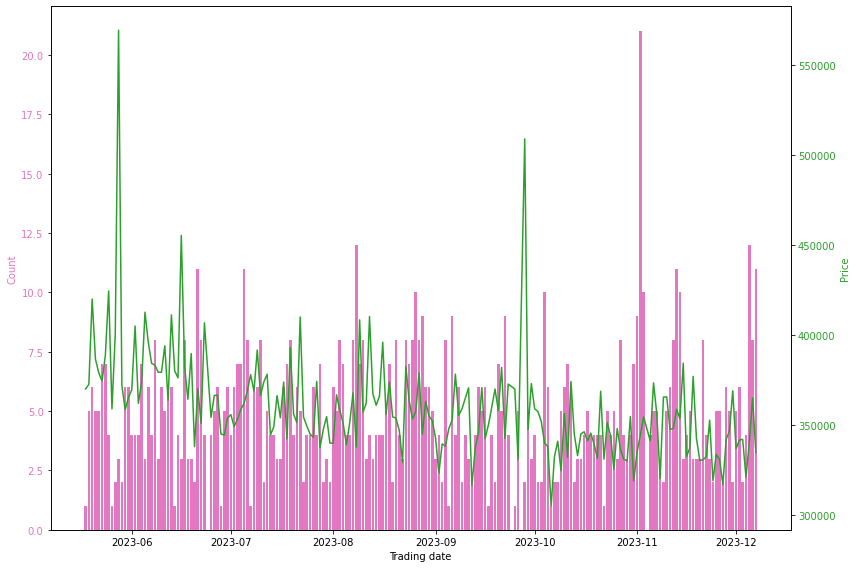

In [56]:
# Jordan 1 Retro High OG University Blue 시각화
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_excel("output.xlsx")

# 날짜 형식 변환
df['거래일'] = pd.to_datetime(df['거래일'], format='%y/%m/%d')

# 거래일을 기준으로 그룹화하여 카운트와 평균 가격 계산
daily_counts = df.groupby('거래일')['사이즈'].count()
daily_prices = df.groupby('거래일')['가격'].mean()

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8)) 

# 첫 번째 y축 설정
color = 'tab:pink'
ax1.set_xlabel('Trading date')  # x축 레이블 설정
ax1.set_ylabel('Count', color=color)
ax1.bar(daily_counts.index, daily_counts, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 설정
ax2 = ax1.twinx()  # 같은 x축을 공유하는 두 번째 축
color = 'tab:green'
ax2.set_ylabel('Price', color=color)
ax2.plot(daily_prices.index, daily_prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 레이아웃 설정
fig.tight_layout()

# 그래프 출력
plt.show()
